In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.stats as stats
from enum import Enum

In [3]:
class EventType(Enum):
    ARRIVAL = 0
    DEPARTURE = 1

In [4]:
class Event(object):
    def __init__(self, event_type, time):
        self.event_type = event_type
        self.time = time

In [5]:
class EventList(object):
    def __init__(self):
        self.events = []
        
    def __len__(self):
        return len(self.events)
        
    def is_empty(self):
        return len(self) == 0
        
    def get_first(self):
        first = self.events[0]
        return first
    
    def enqueue(self, event):
        self.events.append(event)
        self.sort()
    
    def dequeue(self):
        self.sort()
        first = self.get_first()
        self.events = self.events[1:]
        return first
    
    def sort(self):
        self.events = sorted(self.events, key=lambda x: x.time)
        self.events = list(self.events)
        

In [6]:
def interarrival_time():
    return int(np.ceil(np.random.exponential(12)))

def service_time():
    return int(np.ceil(np.random.exponential(8)))

def counts_to_table(counts):
    values = set(counts)
    l = float(len(counts))
    probs = dict()
    for v in values:
        probs[v] = len(counts[counts == v])/l
    return probs
        

In [8]:
# assuming a FCFS queue
# we log the arrival time, time of service, and departure time for each
# customer who enters Rituals
customer_arrival = []
customer_departure = []
customer_service = []
num_customers_system = [] # logs num customers for any particular point in time
num_customers_line = []
server_utilization = 0
event_list = EventList()
first_arrival = interarrival_time()
event_list.enqueue(Event(EventType.ARRIVAL, first_arrival))

time_to_simulate = 60 * 24 * 31
free = True
customers = 0
t = 0

In [9]:

while t < time_to_simulate:
    next_event = event_list.dequeue()
    lt = t
    t = next_event.time
    if t > time_to_simulate:
        break
    diff = t - lt
    num_customers_line.extend([customers] * (diff - 1))
    if free:
        num_customers_system.extend([0] * (diff - 1))
    else:
        num_customers_system.extend([customers + 1] * (diff - 1))
    if next_event.event_type == EventType.ARRIVAL:
        customer_arrival.append(t)
        customers += 1
        if free:
            free = False
            customer_service.append(t)
            customers -= 1
            d_time = service_time() + t
            event_list.enqueue(Event(EventType.DEPARTURE, d_time))
        next_arrival_time = interarrival_time() + t
        arrival_event = Event(EventType.ARRIVAL, next_arrival_time)
        event_list.enqueue(arrival_event)
    elif next_event.event_type == EventType.DEPARTURE:
        customer_departure.append(t)
        free = True
        if customers > 0:
            free = False
            customer_service.append(t)
            customers -= 1
            next_dept_time = t + service_time()
            dept_event = Event(EventType.DEPARTURE, next_dept_time)
            event_list.enqueue(dept_event)

customer_service = np.array(customer_service)
customer_arrival = np.array(customer_arrival)
customer_departure = np.array(customer_departure)
num_customers_line = np.array(num_customers_line)
num_customers_system = np.array(num_customers_system)
    

In [10]:
# get array of times spent in the queue
time_spent_in_queue = customer_service - customer_arrival[0:len(customer_service)]

# get array of times spent in system
time_spent_in_system = customer_departure - customer_arrival[0:len(customer_departure)]

#service times
service_times = customer_departure - customer_service[0:len(customer_departure)]
total_service_time = sum(service_times)
utilization = total_service_time / time_to_simulate

In [11]:
utilization


0.6762544802867384

In [12]:
np.mean(num_customers_system)

1.7518443110605779

In [13]:
np.mean(num_customers_line)

1.1035722784843598

(array([  2.19530000e+04,   5.56600000e+03,   3.86600000e+03,
          2.52900000e+03,   1.42500000e+03,   1.02000000e+03,
          7.24000000e+02,   3.75000000e+02,   2.37000000e+02,
          7.40000000e+01,   3.10000000e+01,   1.80000000e+01,
          1.00000000e+00]),
 array([  0.        ,   0.92307692,   1.84615385,   2.76923077,
          3.69230769,   4.61538462,   5.53846154,   6.46153846,
          7.38461538,   8.30769231,   9.23076923,  10.15384615,
         11.07692308,  12.        ]),
 <a list of 13 Patch objects>)

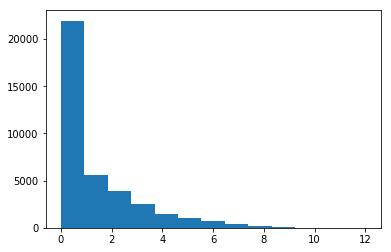

In [14]:
plt.hist(num_customers_line, bins=len(set(num_customers_line)))

(array([ 13302.,   8651.,   5566.,   3866.,   2529.,   1425.,   1020.,
           724.,    375.,    237.,     74.,     31.,     19.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.]),
 <a list of 13 Patch objects>)

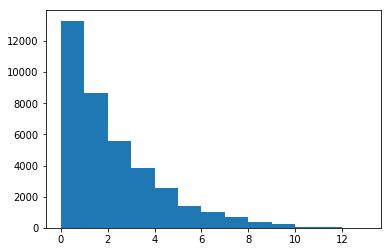

In [15]:
plt.hist(num_customers_system, bins=len(set(num_customers_line)))

In [16]:
counts_to_table(num_customers_system)

{0: 0.3517279674237817,
 1: 0.22874745498294508,
 2: 0.14717470054734394,
 3: 0.10222374996694783,
 4: 0.06687114942224807,
 5: 0.03767947328062614,
 6: 0.026970570348237657,
 7: 0.01914381660012163,
 8: 0.009915650863322668,
 9: 0.006266691345619926,
 10: 0.0019566884370290066,
 11: 0.0008196938047013406,
 12: 0.0004759512414394881,
 13: 2.6441735635527116e-05}

In [17]:
counts_to_table(num_customers_line)

{0: 0.5804754224067268,
 1: 0.14717470054734394,
 2: 0.10222374996694783,
 3: 0.06687114942224807,
 4: 0.03767947328062614,
 5: 0.026970570348237657,
 6: 0.01914381660012163,
 7: 0.009915650863322668,
 8: 0.006266691345619926,
 9: 0.0019566884370290066,
 10: 0.0008196938047013406,
 11: 0.0004759512414394881,
 12: 2.6441735635527116e-05}

In [18]:
np.mean(time_spent_in_queue)

14.463229078613693

In [19]:
np.mean(time_spent_in_system)

22.969287123133277

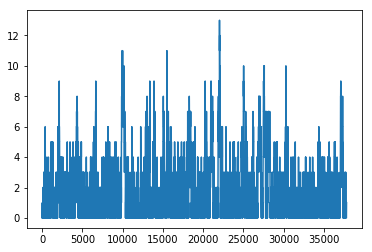

In [20]:
plt.plot(range(len(num_customers_system)), num_customers_system)

In [24]:
rolling_average = []
acc = 0.0
n = 1.0
for c in num_customers_system:
    acc += c
    rolling_average.append(acc/n)

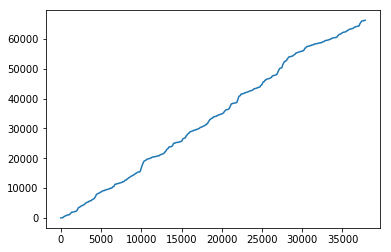

In [25]:
rolling_average = np.array(rolling_average)
plt.plot(range(len(rolling_average)), 
         rolling_average)

In [26]:
first_valid = 0
for i, c in enumerate(customer_arrival):
    if c >= 15000:
        first_valid = i
        break

In [27]:
first_valid

1154

In [28]:
steady_arrivals = customer_arrival[first_valid:]
steady_services = customer_service[first_valid:]
steady_departures = customer_departure[first_valid:]

In [29]:
times_in_service = steady_departures - steady_services[:len(steady_departures)]
times_in_queue = steady_services - steady_arrivals[:len(steady_services)]
times_in_system = steady_departures - steady_arrivals[:len(steady_departures)]

In [30]:
np.mean(times_in_queue)

14.772025052192067

In [31]:
np.mean(times_in_system)

23.087265135699372

In [32]:
utilization = sum(times_in_service) / (time_to_simulate - customer_arrival[first_valid])

In [33]:
print(utilization)

0.672258979206


In [36]:
np.mean(num_customers_line[customer_arrival[first_valid]:])

1.1322194448098934

In [37]:
np.mean(num_customers_system[customer_arrival[first_valid]:])

1.778537911678288